Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [1]:
import pandas as pd
import numpy as np

#import src
import FileProcessing
import ModelClass
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Bidirectional, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

import tensorflow
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import FileProcessing
from sklearn.svm import SVR


In [2]:
fileProcessing=FileProcessing.FileProcessing()

In [3]:
model_obj=ModelClass.ModelClass()
file=FileProcessing.FileProcessing()

In [4]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [5]:
def fit_and_run_SVR(df, time_frame):
    shift_instance = time_frame*10
    df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test = model_obj.preprocessing(df, shift_instance)
    return df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test

In [6]:
def define_SVR( input_df):

    model = SVR(kernel='linear')

    return model

In [9]:
delta_time=0.1
ngsim_1, train_df_1, val_df_1, test_df_1, X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1= fit_and_run_SVR(ngsim, delta_time)

In [13]:
y_train_1

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
2634970    0.000000
2634971    0.000000
2634972    0.000000
2634973    0.124968
2634974   -0.085344
Name: nextframeAcc, Length: 2154544, dtype: float32

In [16]:
#model=define_SVR(train_df_1)
model = SVR(kernel = 'rbf')
model.fit(X=X_train_1, y=y_train_1)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
ngsim=ngsim_1
train_df= train_df_1
val_df=val_df_1,
test_df= test_df_1
X_train= X_train_1
y_train=y_train_1
X_val=X_val_1
y_val=y_val_1
X_test=X_test_1
y_test=y_test_1
time_frame=delta_time
reaction_time=delta_time

In [ ]:

def fit_SVR(model, X_train, y_train, reaction_time):
    modelName = "SVM_model" + str(reaction_time) + ".keras"
    save_callback = keras.callbacks.ModelCheckpoint(
        modelName, save_best_only=True)
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy', verbose=1, patience=7)
        
    model.fit(X_train, y_train)
    return model


In [ ]:
#model=fit_SVR( model,X_train, y_train, reaction_time)

In [ ]:
import pickle 
pickle.dump(model, open('svm_0.1.pkg', 'wb'))

In [ ]:

predict_on_pair = model_obj.prediction_test_pairs(test_df, 10, 12)
predict_on_pair[0]
print(f"Prediction being done on :{predict_on_pair[0]}")
target_variable = 'nextframeAcc'
predict_on_pair = model_obj.prediction_test_pairs(test_df_1, 10, 12)
current_pair=predict_on_pair[0]
predict_on_pair=current_pair
target_variable = 'nextframeAcc'
#current_pair='422-427'


Prediction being done on :380-384


In [ ]:
predict_on_pair

'380-384'

In [ ]:
current_pair

'380-384'

In [ ]:
#predicted_data

In [ ]:
test_df

,Local_Y,v_Class,v_Vel,v_Acc,Following,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframeposition,precnextframesvel
383,68.639435,2,10.576560,1.066800,27,us-101,12.565888,1.188088,-2.456688,1.533144,...,86.030716,2.0,0.000000,32.599998,1.764792,10.725912,69.697395,12.806680,87.331604,13.005816
390,69.697395,2,10.725912,1.764792,27,us-101,12.806680,1.193995,-2.279904,2.097024,...,87.331604,2.0,0.100000,32.599998,3.413760,11.012424,70.769379,13.029184,88.623650,13.033248
397,70.769379,2,11.012424,3.413760,27,us-101,13.029184,1.183135,-2.020824,2.657856,...,88.623650,2.0,0.200000,32.599998,3.413760,11.445240,71.897446,13.199872,89.923927,13.149072
402,71.897446,2,11.445240,3.413760,27,us-101,13.199872,1.153307,-1.703832,1.682496,...,89.923927,2.0,0.300000,32.599998,3.413760,11.945112,73.066658,13.352272,91.245232,13.325856
413,73.066658,2,11.945112,3.413760,27,us-101,13.352272,1.117802,-1.380744,1.450848,...,91.245232,2.0,0.400000,32.599998,3.236976,12.365736,74.278542,13.486384,92.590317,13.496544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634970,473.213593,2,7.040880,0.000000,0,i-80,13.001752,1.846609,4.599432,-0.868680,...,490.826447,2.0,32.099998,32.599998,0.000000,7.040880,473.917664,12.544552,491.075775,2.505456
2634971,473.917664,2,7.040880,0.000000,0,i-80,12.544552,1.781674,4.535424,-0.606552,...,491.075775,2.0,32.200001,32.599998,0.000000,7.040880,474.621765,12.099544,491.333344,2.545080
2634972,474.621765,2,7.040880,0.000000,0,i-80,12.099544,1.718470,4.495800,-0.018288,...,491.333344,2.0,32.299999,32.599998,0.000000,7.040880,475.325836,11.651488,491.588745,2.551176
2634973,475.325836,2,7.040880,0.000000,0,i-80,11.651488,1.654834,4.489704,0.000000,...,491.588745,2.0,32.400002,32.599998,0.124968,7.046976,476.029022,11.200384,491.842957,2.554224


In [ ]:

test_range=predict_on_pair

predicted_df = []
        # this loop runs for each pair required predictions.

# Assign shape of the predictions
input_df = []
input_df = test_df[test_df['L-F_Pair'] == current_pair]
input_df

,Local_Y,v_Class,v_Vel,v_Acc,Following,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframeposition,precnextframesvel
24378,10.967618,2,10.668000,0.000000,0,us-101,11.403584,1.068952,-0.457200,2.953512,...,27.451202,2.0,0.000000,40.0,0.000000,10.668000,12.034418,11.427968,28.542082,10.899648
24437,12.034418,2,10.668000,0.000000,0,us-101,11.427968,1.071238,-0.231648,1.603248,...,28.542082,2.0,0.100000,40.0,0.000000,10.668000,13.101218,11.431016,29.613453,10.765536
24478,13.101218,2,10.668000,0.000000,0,us-101,11.431016,1.071524,-0.097536,0.377952,...,29.613453,2.0,0.200000,40.0,0.000000,10.668000,14.168018,11.440160,30.688179,10.732008
24574,14.168018,2,10.668000,0.000000,0,us-101,11.440160,1.072381,-0.064008,0.472440,...,30.688179,2.0,0.300000,40.0,0.000000,10.668000,15.234513,11.446256,31.761379,10.692384
24596,15.234513,2,10.668000,0.000000,0,us-101,11.446256,1.072952,-0.024384,0.566928,...,31.761379,2.0,0.400000,40.0,0.006096,10.668000,16.301313,11.440160,32.822693,10.655808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45949,475.185638,2,17.663160,1.353312,388,us-101,9.864344,0.558470,2.426208,1.307592,...,490.129669,2.0,39.500000,40.0,1.085088,17.775936,476.959259,9.614408,491.653992,15.240000
46002,476.959259,2,17.775936,1.085088,388,us-101,9.614408,0.540866,2.535936,1.085088,...,491.653992,2.0,39.599998,40.0,0.088392,17.839945,478.749359,9.349232,493.177979,15.240000
46048,478.749359,2,17.839945,0.088392,388,us-101,9.349232,0.524062,2.599944,0.088392,...,493.177979,2.0,39.700001,40.0,-0.307848,17.830799,480.536407,9.087104,494.701996,15.240000
46101,480.536407,2,17.830799,-0.307848,388,us-101,9.087104,0.509630,2.590800,-0.307848,...,494.701996,2.0,39.799999,40.0,-0.323088,17.803368,482.318268,8.828024,496.225983,15.240000


In [ ]:
#predicted_df.head

KeyError: 'predicted_acceleration'

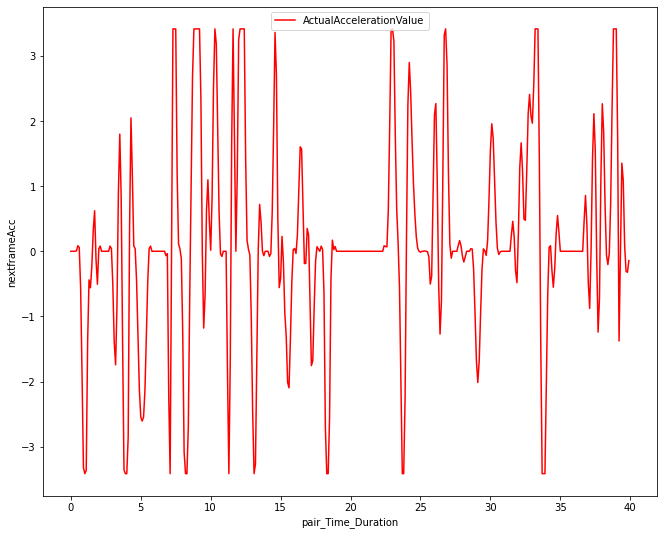

In [ ]:
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_acceleration', 'nextframeAcc', 'Acceleration', delta_time)
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_velocity', 'nextframesvel', 'Velocity', delta_time)
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_spacing', 'nextFrameSpacing', 'Spacing', delta_time)


In [ ]:
input_df

In [ ]:

fileProcessing.export_file(input_df,'input_df')